In [9]:
#ライブラリ読み込み
from PIL import Image
import numpy as np #numpyをこの先npという
import matplotlib.pyplot as plt


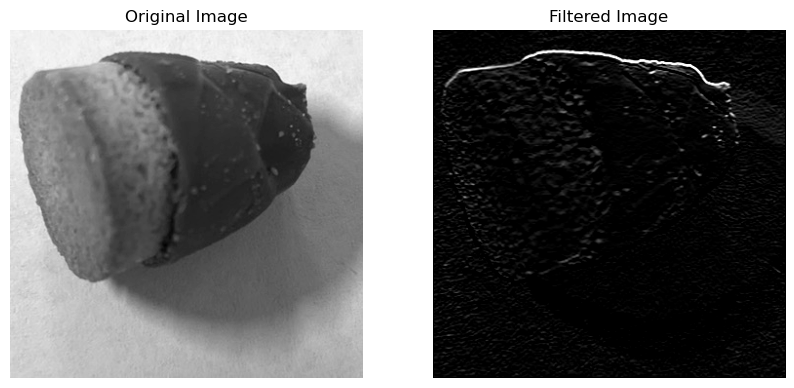

In [10]:

# 画像を読み込み、グレースケールに変換
image_path = 'test2/23269757-DC64-4584-B9C6-4B6FC247C43A_4_5005_c.jpeg'  # 画像のパスを指定
image = Image.open(image_path).convert('L')  # グレースケールに変換
image_array = np.array(image)

# 3x3フィルタを定義
filter1 = np.array([[1, 0, -1], #エッジ検出
                       [0, 0,  0],
                       [-1, 0, 1]])

filter2 = np.array([[-2, 1, 1], #縦エッジ検出
                       [-2, 1,  1],
                       [-2, 1, 1]])

filter3= np.array([[1, 1, 1], #横エッジ検出
                       [1, 1,  1],
                       [-2, -2, -2]])

# フィルタを画像に適用する関数
def apply_filter(image, filt):
    filtered_image = np.zeros_like(image)  # フィルタ後の画像を保存する配列

    # 画像の高さと幅を取得

    height, width = image.shape

    # フィルタを適用 (境界処理としては中央部分のみ)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # 3x3の領域を取り出してフィルタを適用
            region = image[i-1:i+2, j-1:j+2]
            filtered_value = np.sum(region * filter3)
            filtered_image[i, j] = np.clip(filtered_value, 0, 255)

    return filtered_image

# フィルタを画像に適用
filtered_image_array = apply_filter(image_array, filter2)

# 結果を表示
plt.figure(figsize=(10, 5))

# 元の画像
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# フィルタ適用後の画像
plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image_array, cmap='gray')
plt.axis('off')

plt.show()
